# Tradeoff Curves for all five cells

In [1]:
import numpy as np
import pylab as plt
%matplotlib inline
cols = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
cellnames = ['l5cell', 'pvcell', 'martinotti', 'purkinje', 'granule']

def plot_comparison(l5,pv,mt,pk,gr):
    cells = [l5, pv, mt, pk, gr]
    names = ['L5 pyr.', 'PV cell', 'Martinotti', 'Purkinje','Granule']

    fig = plt.figure()
    for tradeoff,col in zip(cells,cols):
        plt.plot(tradeoff[:,0],tradeoff[:,1],'-',color=col,lw=3)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim([1e1,1e5])
    plt.ylim([1,150])
    plt.legend(names,loc='best')
    return fig

# Without Reattachment

/home/alex/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


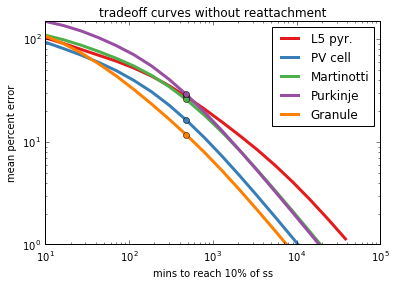

In [2]:
p = './data/no_reattach/'
fig = plot_comparison(*[ np.loadtxt(p+cn+'_tradeoff.txt') for cn in cellnames ])

for color,cn in zip(cols,cellnames):
    pt = np.loadtxt(p+cn+'_pt.txt')
    plt.plot(pt[0]/60,pt[1],'o',color=color,mfc=color)

plt.title('tradeoff curves without reattachment')
plt.xlabel('mins to reach 10% of ss')
plt.ylabel('mean percent error')
fig.savefig('comparison_no_reattach.eps')
fig.show()

# With Reattachment

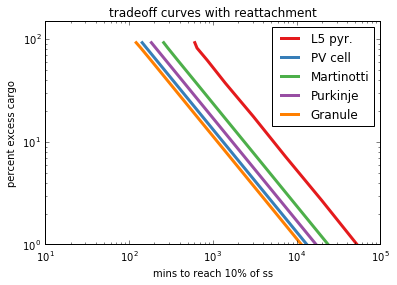

In [3]:
p = './data/with_reattach/'
fig = plot_comparison(*[ np.loadtxt(p+cn+'_tradeoff.txt') for cn in cellnames ])
plt.title('tradeoff curves with reattachment')
plt.xlabel('mins to reach 10% of ss')
plt.ylabel('percent excess cargo')
fig.savefig('comparison_with_reattach.eps')
fig.show()

# Colormaps used in figure

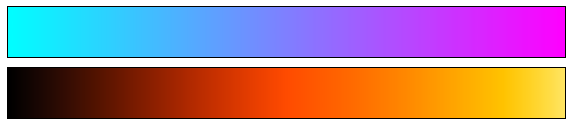

In [4]:
from palettable.cubehelix import Cubehelix
from matplotlib.pyplot import cm

u_cmap = cm.cool
us_cmap = Cubehelix.make(start=1, min_light=0.0, max_light=0.9, max_sat=6.0, rotation=0.13).mpl_colormap
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

plt.figure(figsize=(10,2))
ax = plt.subplot(211)
ax.imshow(gradient, aspect='auto', cmap=u_cmap), plt.xticks([]), plt.yticks([])
ax = plt.subplot(212)
ax.imshow(gradient, aspect='auto', cmap=us_cmap), plt.xticks([]), plt.yticks([])
plt.savefig('colbars.eps')
plt.show()